### Do
- run all subjects
- subsample trials because e.g., S08 and S09 don't have the same number of trials
- take that code, and plug in other classifiers
- use on more subjects, each subject one by one
- concatenate all the electrodes together across subjects, and see what you find

### Done
- j-remi classifier over time
- try S09 as well

### Import packages

In [12]:
# general packages
import numpy as np
import matplotlib.pyplot as plt

# sklearn models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# mne
import mne
import pickle
# edit here
# sample dataset
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)

# Load preprocessed data

## How can I load the pickled data or otherwise the dictionary?

In [18]:
with open('../data/decision-making/data/data_preproc/X.pickle', 'rb') as handle:
    X = pickle.load(handle)

In [24]:
with open('../data/decision-making/data/data_preproc/y.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [29]:
X[0].shape

(180, 5, 3001)

In [32]:
y[0].shape

(180,)

In [16]:
# # Save
# dictionary = {'hello':'world'}
# np.save('my_file.npy', dictionary) 

# Load
# read_dictionary = np.load('../data/decision-making/data/data_preproc/X.npy')
# print(read_dictionary['hello'])

In [15]:
read_dictionary.shape

(136, 16, 3001)

In [41]:
favorite_color = pickle.load( open( '../data/decision-making/data/data_preproc/X.pickle', "rb" ) )

EOFError: Ran out of input

In [6]:
import pickle

In [7]:
with open('../data/decision-making/data/data_preproc/X.pickle', 'rb') as handle:
    X = pickle.load(handle)

In [11]:
X[9].shape

(136, 16, 3001)

In [42]:
target = '../data/decision-making/data/data_preproc/X.pickle'
if os.path.getsize(target) > 0:      
    with open(target, "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()

In [38]:
with open('../data/decision-making/data/data_preproc/X.pickle', 'wb') as handle:
    pickle.load('../data/decision-making/data/data_preproc/X.pickle')

TypeError: file must have 'read' and 'readline' attributes

In [35]:
X = pickle.load('../data/decision-making/data/data_preproc/X.pickle')

TypeError: file must have 'read' and 'readline' attributes

In [19]:
X1 = np.load('../data/decision-making/data/data_preproc/X1.npy')
X8 = np.load('../data/decision-making/data/data_preproc/X8.npy')
# X9 = np.load('../data/decision-making/data/data_preproc/X9.npy')

In [20]:
X1.shape

(180, 5, 3001)

In [21]:
# X8.shape, X9.shape

# n_epochs (200) x n_channels (10) x n_times (3001)

In [22]:
y1 = np.load('../data/decision-making/data/data_preproc/y1.npy')

In [4]:
y8 = np.load('../data/decision-making/data/data_preproc/y8.npy')
y9 = np.load('../data/decision-making/data/data_preproc/y9.npy')

In [23]:
y1.shape

(180,)

In [5]:
y8.shape, y9.shape
# n_epochs (200)

((200,), (200,))

## Try decoding exercise:
https://martinos.org/mne/stable/auto_tutorials/plot_sensors_decoding.html#sphx-glr-auto-tutorials-plot-sensors-decoding-py

In [24]:
import warnings
warnings.filterwarnings("ignore")

## X8 and X9: decoding over time

In [1]:
X8.shape, y8.shape, # n_channels, n_times

NameError: name 'X8' is not defined

In [2]:
X9.shape, y9.shape, # n_channels, n_times

NameError: name 'X9' is not defined

In [9]:
np.unique(y9)

array(['Gamble', 'Safebet'], dtype=object)

In [33]:
# Might need to convert "gamble" to "1", and "safebet" to 0

### subject 1

In [29]:
# properties of model
clf = make_pipeline(StandardScaler(), LogisticRegression())
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')

# notice subject here
scores = cross_val_multiscore(time_decod, X1, y1, cv=5, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

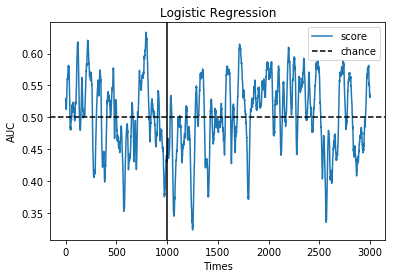

In [30]:
# Plot
fig, ax = plt.subplots()
# ax.plot(epochs.times, scores, label='score')
ax.plot(scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(1000, color='k', linestyle='-')
ax.set_title('Logistic Regression')
plt.show()

### X8

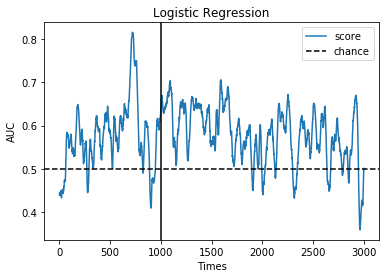

In [35]:
# properties of model
clf = make_pipeline(StandardScaler(), LogisticRegression())
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')

# replacing X and y with X8 and y8
scores = cross_val_multiscore(time_decod, X8, y8, cv=5, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

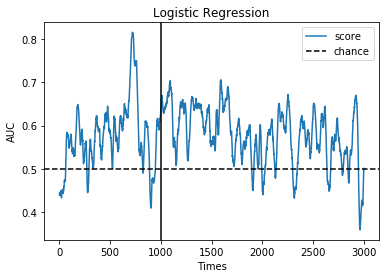

In [36]:
# Plot
fig, ax = plt.subplots()
# ax.plot(epochs.times, scores, label='score')
ax.plot(scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(1000, color='k', linestyle='-')
ax.set_title('Logistic Regression')
plt.show()

## X9

In [15]:
# properties of model
clf = make_pipeline(StandardScaler(), LogisticRegression())
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')

# replacing X and y with X9 and y9
scores = cross_val_multiscore(time_decod, X9, y9, cv=5, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

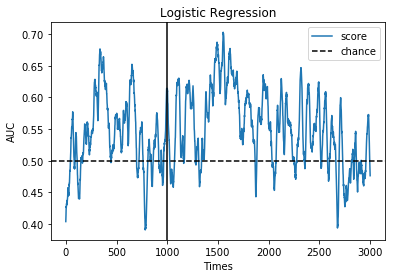

In [16]:
# Plot
fig, ax = plt.subplots()
# ax.plot(epochs.times, scores, label='score')
ax.plot(scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(1000, color='k', linestyle='-')
ax.set_title('Logistic Regression')
plt.show()